In [338]:
import pandas as pd
import matplotlib.pyplot as plt
# import hvplot.pandas
# import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

In [339]:
# Read in the dataset

csv_path = Path("seattle-neighborhoods.csv")

# seattle_df = pd.read_csv(csv_path, index_col=["Month of Period End"])

df = pd.read_csv(csv_path)

# pd.read_excel("seattle-neighborhoods.xlsx", index_col=["Month of Period End"], 
#                   infer_datetime_format=True, parse_dates=True)

In [340]:
# Use fill method to fill Region column with all applicable cities (fill down)

df.head()
df = df.fillna(method="pad")
df.tail()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
10353,"Seattle, WA - Seaview",June 2020,$860K,1.8%,16.3%,23,-11.5%,-20.7%,31,29.2%,-18.4%,9,125.0%,-40.0%,6.0,0.0,-5.0,102.0%,-0.3%,1.0%
10354,"Seattle, WA - Seaview",July 2020,$830K,-3.5%,14.5%,27,17.4%,-15.6%,46,48.4%,53.3%,15,66.7%,66.7%,5.0,-1.0,-5.0,100.9%,-1.1%,0.1%
10355,"Seattle, WA - Seaview",August 2020,$845K,1.7%,18.5%,30,11.1%,0.0%,50,8.7%,78.6%,18,20.0%,125.0%,7.0,2.0,-3.0,101.3%,0.5%,0.3%
10356,"Seattle, WA - Seaview",September 2020,$783K,-7.3%,11.7%,34,13.3%,30.8%,47,-6.0%,161.1%,19,5.6%,111.1%,7.0,0.0,-3.0,101.1%,-0.2%,0.7%
10357,"Seattle, WA - Seaview",October 2020,$794K,1.5%,17.6%,36,5.9%,44.0%,37,-21.3%,68.2%,11,-42.1%,57.1%,8.0,1.0,-6.0,102.1%,1.0%,2.6%


In [341]:
# Creating a dataframe with Seattle data only and dropping the neighborhoods.  
# Using string replace to list Seattle only and not Washington. 

seattle_df = df.drop(df[df["Region"] != "Seattle, WA"].index)

seattle_df["Region"] = seattle_df["Region"].str.replace("Seattle, WA", "Seattle")
seattle_df.head()


,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Seattle,February 2012,$320K,6.7%,-5.9%,495,11.7%,14.6%,779,21.3%,-11.5%,"1,928",-4.8%,-33.9%,62.0,2.0,-12.0,97.2%,0.3%,0.8%
1,Seattle,March 2012,$350K,9.4%,0.0%,670,35.4%,0.8%,998,28.1%,-5.9%,"1,930",0.1%,-34.7%,40.0,-22.0,-26.0,98.1%,0.9%,1.3%
2,Seattle,April 2012,$379K,8.3%,7.2%,778,16.1%,14.1%,"1,037",3.9%,-7.9%,"1,944",0.7%,-36.9%,30.0,-10.0,-13.0,98.5%,0.4%,1.2%
3,Seattle,May 2012,$380K,0.3%,9.4%,890,14.4%,28.6%,"1,077",3.9%,4.9%,"1,952",0.4%,-36.7%,19.0,-11.0,-15.0,99.2%,0.7%,1.9%
4,Seattle,June 2012,$380K,0.0%,8.1%,927,4.2%,13.6%,"1,014",-5.8%,-6.2%,"1,969",0.9%,-38.4%,17.0,-2.0,-20.0,99.3%,0.1%,2.0%


In [342]:
# Creating a dataframe with neighborhood data only and dropping Seattle specific data.  
# Using string replace to split on the "-" and referencing only the Neighborhood. 

neighborhood_df = df.drop(df[df["Region"] == "Seattle, WA"].index)
neighborhood_df.head()
neighborhood_df["Region"] = neighborhood_df["Region"].str.split("-")

neighborhood_df["Region"] = neighborhood_df["Region"].str[1]
neighborhood_df.tail()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
10353,Seaview,June 2020,$860K,1.8%,16.3%,23,-11.5%,-20.7%,31,29.2%,-18.4%,9,125.0%,-40.0%,6.0,0.0,-5.0,102.0%,-0.3%,1.0%
10354,Seaview,July 2020,$830K,-3.5%,14.5%,27,17.4%,-15.6%,46,48.4%,53.3%,15,66.7%,66.7%,5.0,-1.0,-5.0,100.9%,-1.1%,0.1%
10355,Seaview,August 2020,$845K,1.7%,18.5%,30,11.1%,0.0%,50,8.7%,78.6%,18,20.0%,125.0%,7.0,2.0,-3.0,101.3%,0.5%,0.3%
10356,Seaview,September 2020,$783K,-7.3%,11.7%,34,13.3%,30.8%,47,-6.0%,161.1%,19,5.6%,111.1%,7.0,0.0,-3.0,101.1%,-0.2%,0.7%
10357,Seaview,October 2020,$794K,1.5%,17.6%,36,5.9%,44.0%,37,-21.3%,68.2%,11,-42.1%,57.1%,8.0,1.0,-6.0,102.1%,1.0%,2.6%


In [343]:
# Using string replace to drop dollar signs and replace with empty strings on both dataframes. 

# seattle_df["Median Sale Price"] = seattle_df["Median Sale Price"].str.replace("K", "")
seattle_df["Median Sale Price"] = seattle_df["Median Sale Price"].str.replace("$", "")
neighborhood_df["Median Sale Price"] = neighborhood_df["Median Sale Price"].str.replace("$", "")
seattle_df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Seattle,February 2012,320K,6.7%,-5.9%,495,11.7%,14.6%,779,21.3%,-11.5%,"1,928",-4.8%,-33.9%,62.0,2.0,-12.0,97.2%,0.3%,0.8%
1,Seattle,March 2012,350K,9.4%,0.0%,670,35.4%,0.8%,998,28.1%,-5.9%,"1,930",0.1%,-34.7%,40.0,-22.0,-26.0,98.1%,0.9%,1.3%
2,Seattle,April 2012,379K,8.3%,7.2%,778,16.1%,14.1%,"1,037",3.9%,-7.9%,"1,944",0.7%,-36.9%,30.0,-10.0,-13.0,98.5%,0.4%,1.2%
3,Seattle,May 2012,380K,0.3%,9.4%,890,14.4%,28.6%,"1,077",3.9%,4.9%,"1,952",0.4%,-36.7%,19.0,-11.0,-15.0,99.2%,0.7%,1.9%
4,Seattle,June 2012,380K,0.0%,8.1%,927,4.2%,13.6%,"1,014",-5.8%,-6.2%,"1,969",0.9%,-38.4%,17.0,-2.0,-20.0,99.3%,0.1%,2.0%


In [344]:
# Replacing "%", ":", ",", and "K" values with blank strings.  
# Leaving Median Sale Price as 3 digit values for ease of scaling.  

seattle_df = seattle_df.replace({"%":"", ",":"", "K":""}, regex=True)
neighborhood_df = neighborhood_df.replace({"%":"", ",":"", "K":""}, regex=True)
neighborhood_df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
105,Adams,February 2012,348,-0.7,3.7,40,-7.0,25.0,28,-15.2,-37.8,30,-3.2,-37.5,40.0,-10.0,-17.0,98.6,0.2,1.0
106,Adams,March 2012,347,-0.1,4.4,40,0.0,11.1,43,53.6,-33.8,25,-16.7,-50.0,49.0,10.0,-6.0,98.6,-0.1,0.3
107,Adams,April 2012,325,-6.3,-6.7,47,17.5,6.8,65,51.2,20.4,37,48.0,-22.9,46.0,-4.0,27.0,98.7,0.2,0.1
108,Adams,May 2012,332,2.0,-8.4,56,19.1,21.7,71,9.2,26.8,32,-13.5,-37.3,37.0,-9.0,8.0,99.2,0.4,0.7
109,Adams,June 2012,328,-1.1,-2.2,63,12.5,61.5,68,-4.2,41.7,25,-21.9,-50.0,16.0,-21.0,-23.0,99.0,-0.2,-0.6


In [345]:
# Looping through columns of seattle_df to change datatypes to floats and/or integers on all columns except 
# Region and Month of Period End. 

cols = [i for i in seattle_df.columns if i not in ["Region", "Month of Period End"]]
for col in cols: 
    seattle_df[col]=pd.to_numeric(seattle_df[col])

In [346]:
# Checking data types to ensure all needed columns are now a float or integer. 
seattle_df.dtypes

Region                        object
Month of Period End           object
Median Sale Price              int64
Median Sale Price MoM        float64
Median Sale Price YoY        float64
Homes Sold                     int64
Homes Sold MoM               float64
Homes Sold YoY               float64
New Listings                   int64
New Listings MoM             float64
New Listings YoY             float64
Inventory                      int64
Inventory MoM                float64
 Inventory YoY               float64
Days on Market               float64
Days on Market MoM           float64
Days on Market YoY           float64
Average Sale To List         float64
Average Sale To List MoM     float64
Average Sale To List YoY     float64
dtype: object

In [347]:
# Looping through columns of neighborhood_df to change datatypes to floats and/or integers on all columns except 
# Region and Month of Period End. 
cols = [i for i in neighborhood_df.columns if i not in ["Region", "Month of Period End"]]
for col in cols: 
    neighborhood_df[col]=pd.to_numeric(neighborhood_df[col])

In [348]:
# Verifying all data types needing changed were changed. 
neighborhood_df.dtypes

Region                        object
Month of Period End           object
Median Sale Price              int64
Median Sale Price MoM        float64
Median Sale Price YoY        float64
Homes Sold                     int64
Homes Sold MoM               float64
Homes Sold YoY               float64
New Listings                   int64
New Listings MoM             float64
New Listings YoY             float64
Inventory                      int64
Inventory MoM                float64
 Inventory YoY               float64
Days on Market               float64
Days on Market MoM           float64
Days on Market YoY           float64
Average Sale To List         float64
Average Sale To List MoM     float64
Average Sale To List YoY     float64
dtype: object

In [349]:
# Setting index to Month of Period End for seattle_df. 

seattle_df.set_index("Month of Period End", inplace=True)
seattle_df.head()

,Region,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Month of Period End,,,,,,,,,,,,,,,,,,,
February 2012,Seattle,320,6.7,-5.9,495,11.7,14.6,779,21.3,-11.5,1928,-4.8,-33.9,62.0,2.0,-12.0,97.2,0.3,0.8
March 2012,Seattle,350,9.4,0.0,670,35.4,0.8,998,28.1,-5.9,1930,0.1,-34.7,40.0,-22.0,-26.0,98.1,0.9,1.3
April 2012,Seattle,379,8.3,7.2,778,16.1,14.1,1037,3.9,-7.9,1944,0.7,-36.9,30.0,-10.0,-13.0,98.5,0.4,1.2
May 2012,Seattle,380,0.3,9.4,890,14.4,28.6,1077,3.9,4.9,1952,0.4,-36.7,19.0,-11.0,-15.0,99.2,0.7,1.9
June 2012,Seattle,380,0.0,8.1,927,4.2,13.6,1014,-5.8,-6.2,1969,0.9,-38.4,17.0,-2.0,-20.0,99.3,0.1,2.0


In [350]:
# Setting index to Month of Period End for neighborhood_df. 

neighborhood_df.set_index("Month of Period End", inplace=True)
neighborhood_df.head()

,Region,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Month of Period End,,,,,,,,,,,,,,,,,,,
February 2012,Adams,348,-0.7,3.7,40,-7.0,25.0,28,-15.2,-37.8,30,-3.2,-37.5,40.0,-10.0,-17.0,98.6,0.2,1.0
March 2012,Adams,347,-0.1,4.4,40,0.0,11.1,43,53.6,-33.8,25,-16.7,-50.0,49.0,10.0,-6.0,98.6,-0.1,0.3
April 2012,Adams,325,-6.3,-6.7,47,17.5,6.8,65,51.2,20.4,37,48.0,-22.9,46.0,-4.0,27.0,98.7,0.2,0.1
May 2012,Adams,332,2.0,-8.4,56,19.1,21.7,71,9.2,26.8,32,-13.5,-37.3,37.0,-9.0,8.0,99.2,0.4,0.7
June 2012,Adams,328,-1.1,-2.2,63,12.5,61.5,68,-4.2,41.7,25,-21.9,-50.0,16.0,-21.0,-23.0,99.0,-0.2,-0.6


In [351]:
import statsmodels.api as sm

# Tyring the Hodrick-Prescott Filter to analyze noise and trend of Median Sale Price data. 

seattle_noise, seattle_trend = sm.tsa.filters.hpfilter(seattle_df["Median Sale Price"])

In [352]:
# Putting noise and trend from HP Filter into a dataframe with Median Sale Price to prepare to plot / visualize.

seattle_hp = seattle_df["Median Sale Price"].to_frame()
seattle_hp["Noise"] = seattle_noise
seattle_hp["Trend"] = seattle_trend
seattle_hp.tail()

,Median Sale Price,Noise,Trend
Month of Period End,,,
June 2020,742,21.382355,720.617645
July 2020,740,15.445254,724.554746
August 2020,759,30.455874,728.544126
September 2020,745,12.446925,732.553075
October 2020,746,9.432080,736.567920


<AxesSubplot:title={'center':'Median Sale Price vs. Trend'}, xlabel='Month of Period End'>

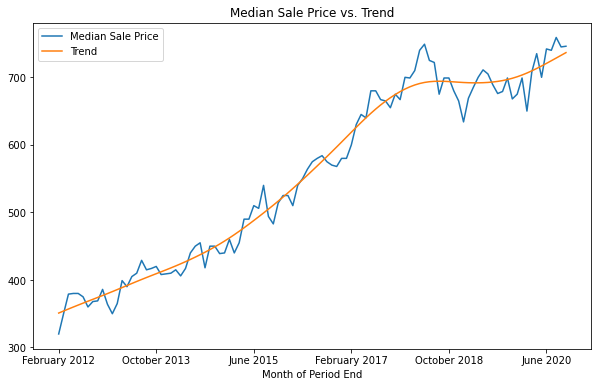

In [353]:
# Plotting Median Sale Price vs. HP Filter trend to visualize similarities.

seattle_hp.plot(y=["Median Sale Price", "Trend"], figsize=(10,6), title="Median Sale Price vs. Trend")

<AxesSubplot:title={'center':'Median Sale Price vs. Trend vs. Exponentially Weighted Moving Average'}, xlabel='Month of Period End'>

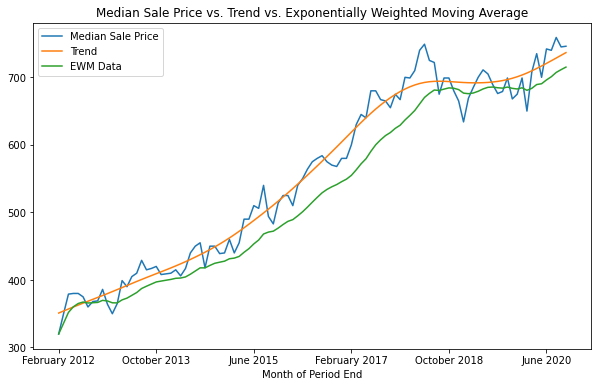

In [354]:
# Adding a column to seattle_hp dataframe with EWMA data

seattle_hp["EWM Data"] = seattle_hp["Median Sale Price"].ewm(halflife=6).mean()

# Plotting Median Sale Price, Trend, and Exponentially Weighted Moving Average data on 1 graph to compare. 

seattle_hp.plot(y=["Median Sale Price", "Trend", "EWM Data"], figsize=(10,6), 
                title="Median Sale Price vs. Trend vs. Exponentially Weighted Moving Average")

# seattle_hp["Median Sale Price"].ewm(halflife=6).mean().plot(figsize=(15,10), 
#                                                             title="Median Sale Price Exponentially-Weighted Moving Average")

### ARMA / ARIMA / GARCH Modeling

<AxesSubplot:xlabel='Month of Period End'>

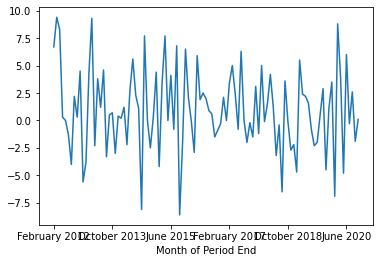

In [355]:
# Leveraging the pct_change of Median Sale Price (Median Sale Price MoM Column) to make data stationary and ready 
# for ARMA / ARIMA / GARCH models.

seattle_df["Median Sale Price MoM "].plot()

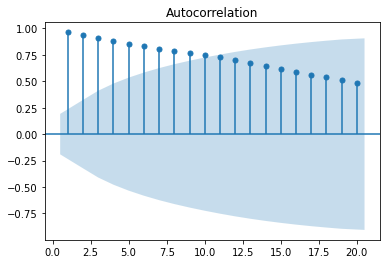

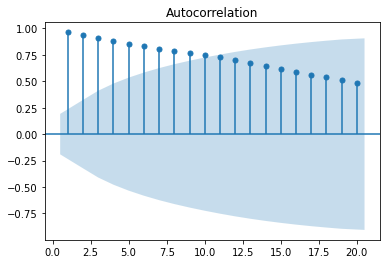

In [356]:
# Testing autocorrelation to determine AR and MA variables.

import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(seattle_df["Median Sale Price"], lags=20, zero=False)

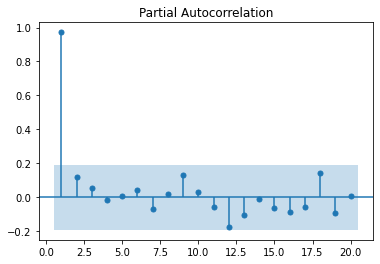

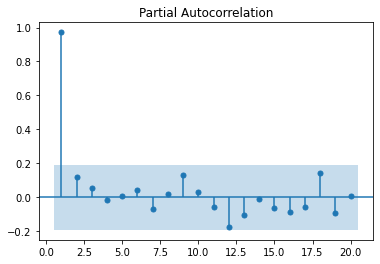

In [357]:
plot_pacf(seattle_df["Median Sale Price"], lags=20, zero=False)

In [358]:
# Running ARMA Model

import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARMA

arma_model = ARMA(seattle_df["Median Sale Price MoM "], order=(1,1))

arma_results = arma_model.fit()

arma_results.summary()

# Good P-values found (< 0.05). 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARMA Model Results                                
==================================================================================
Dep. Variable:     Median Sale Price MoM    No. Observations:                  105
Model:                         ARMA(1, 1)   Log Likelihood                -285.227
Method:                           css-mle   S.D. of innovations              3.658
Date:                    Thu, 10 Dec 2020   AIC                            578.455
Time:                            17:37:51   BIC                            589.070
Sample:                        02-01-2012   HQIC                           582.756
                             - 10-01-2020                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.8763      0.188      4.652      0.000       0.507       1.245
ar.L1.Median Sale Price MoM      0.6686      0.174      3.854      0.000       0.329       1.009
ma.L1.Median Sale Price MoM     -0.8315      0.126     -6.589      0.000      -1.079      -0.584
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4956           +0.0000j            1.4956            0.0000
MA.1            1.2027           +0.0000j            1.2027            0.0000
-----------------------------------------------------------------------------
"""

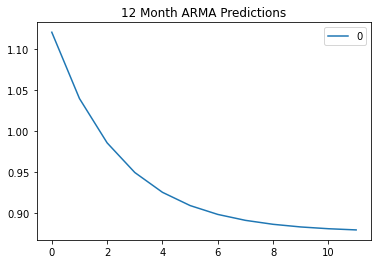

In [359]:
# Plotting 12 month ARMA prediction values, based on % change.  Based on predictions, changes seem to be stabilizing / leveling out. 

pd.DataFrame(arma_results.forecast(steps=12)[0]).plot(title="12 Month ARMA Predictions")
# seattle_df.tail()
arma_predictions = arma_results.forecast(steps=12)[0]

In [360]:
# Running ARIMA Model

from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(seattle_df["Median Sale Price MoM "], order=(1,1,1))

arima_results = arima_model.fit()
arima_results.summary()

# Poor p-value for AR, but good p-value for MA.  Looking for p-value <0.05.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                 
====================================================================================
Dep. Variable:     D.Median Sale Price MoM    No. Observations:                  104
Model:                       ARIMA(1, 1, 1)   Log Likelihood                -285.907
Method:                             css-mle   S.D. of innovations              3.694
Date:                      Thu, 10 Dec 2020   AIC                            579.814
Time:                              17:37:52   BIC                            590.392
Sample:                          03-01-2012   HQIC                           584.100
                               - 10-01-2020                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0141      0.011     -1.324      0.186      -0.035       0.007
ar.L1.D.Median Sale Price MoM     -0.1209      0.098     -1.234      0.217      -0.313       0.071
ma.L1.D.Median Sale Price MoM     -0.9999      0.026    -38.312      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -8.2701           +0.0000j            8.2701            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

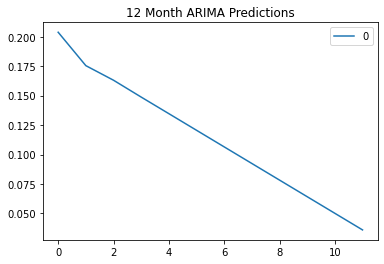

In [361]:
# Plotting 12 month predictions of ARIMA model, based on % change.  ARIMA model shows downward trend 
# of % changes, similar to ARMA model.  

pd.DataFrame(arima_results.forecast(steps=12)[0]).plot(title="12 Month ARIMA Predictions")
# seattle_df.tail()
arima_predictions = arima_results.forecast(steps=12)[0]

<AxesSubplot:title={'center':'ARMA vs. ARIMA Predictions of % Change'}>

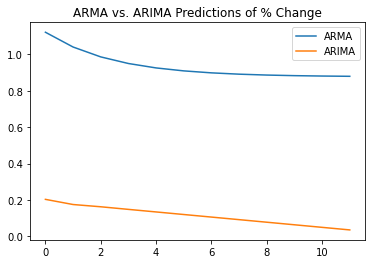

In [562]:
# Creating a dataframe to hold ARMA and ARIMA predicted values.  Plotting to see comparison of predictions across models. 

data = {
    "ARMA" : arma_predictions,
    "ARIMA" : arima_predictions
}

comparison_df = pd.DataFrame(data)
comparison_df.plot(title="ARMA vs. ARIMA Predictions of % Change")

In [363]:
# Running GARCH Model
import arch 
from arch import arch_model

# Estimate a GARCH model:
garch_model = arch_model(seattle_df["Median Sale Price MoM "], mean="zero", vol="Garch", p=2, q=1)

# Fit the model
garch_results = garch_model.fit(disp="off")
garch_results.summary()

# No good p-values found in GARCH model. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Zero Mean - GARCH Model Results                          
==================================================================================
Dep. Variable:     Median Sale Price MoM    R-squared:                       0.000
Mean Model:                     Zero Mean   Adj. R-squared:                  0.010
Vol Model:                          GARCH   Log-Likelihood:               -287.617
Distribution:                      Normal   AIC:                           583.235
Method:                Maximum Likelihood   BIC:                           593.850
                                            No. Observations:                  105
Date:                    Thu, Dec 10 2020   Df Residuals:                      101
Time:                            17:37:53   Df Model:                            4
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          7.4610     15.973      0.467      0.640   [-23.845, 38.767]
alpha[1]       0.2720      0.130      2.094  3.626e-02 [1.741e-02,  0.527]
alpha[2]   5.7021e-16      0.422  1.351e-15      1.000   [ -0.827,  0.827]
beta[1]        0.2210      1.503      0.147      0.883   [ -2.724,  3.166]
==========================================================================

Covariance estimator: robust
"""

In [364]:
# Setting index to datetime format and pulling the last month of the index to forecast 5 months out
# with GARCH model.

seattle_df["Median Sale Price MoM "].index = pd.to_datetime(seattle_df["Median Sale Price MoM "].index,
                                                            infer_datetime_format=True)
last_day = seattle_df["Median Sale Price MoM "].index.max().strftime('%Y-%m-%d')
last_day


'2020-10-01'

In [365]:
# Start the forecast using the last_day calculated above

forecast_horizon = 5
forecasts = garch_results.forecast(horizon = forecast_horizon)

In [366]:
# Generating predictions for 5 months out.  Since GARCH is variance, calculating accordingly.

intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Month of Period End,,,,,
October 2020,49.986539,55.785229,58.432561,59.694491,60.306899


In [367]:
# Transposing dataframe. 

final = intermediate.dropna().T
final.head()

Month of Period End,October 2020
h.1,49.986539
h.2,55.785229
h.3,58.432561
h.4,59.694491
h.5,60.306899


<AxesSubplot:title={'center':'12 Month Forecast Volatility'}>

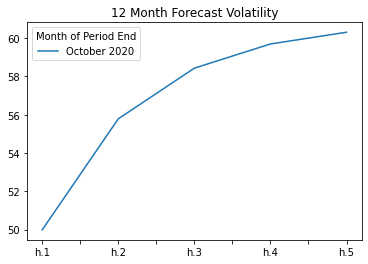

In [368]:
# Plotting GARCH model predictions of volatility. Volatility trends up as predictions go further out. 

final.plot(title="12 Month Forecast Volatility")

### K-Means Clustering of Neighborhoods

In [369]:
# Trying K-Means to Cluster Neighborhoods
from sklearn.cluster import KMeans
from pathlib import Path

In [370]:
# Encoding dataframe to assign integers to all neighborhood data.  Allows data to be grouped / clustered
# accordingly. 

encoded_neighborhood = pd.get_dummies(neighborhood_df)
encoded_neighborhood.head()

,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,...,Region_ Rainier View,Region_ Ravenna,Region_ Ravenna Park,Region_ Renton Hill,Region_ Riverview,Region_ Roosevelt,Region_ Roosevelt Heights,Region_ Roxhill,Region_ Seattle Central Business District,Region_ Seaview
Month of Period End,,,,,,,,,,,,,,,,,,,,,
February 2012,348,-0.7,3.7,40,-7.0,25.0,28,-15.2,-37.8,30,...,0,0,0,0,0,0,0,0,0,0
March 2012,347,-0.1,4.4,40,0.0,11.1,43,53.6,-33.8,25,...,0,0,0,0,0,0,0,0,0,0
April 2012,325,-6.3,-6.7,47,17.5,6.8,65,51.2,20.4,37,...,0,0,0,0,0,0,0,0,0,0
May 2012,332,2.0,-8.4,56,19.1,21.7,71,9.2,26.8,32,...,0,0,0,0,0,0,0,0,0,0
June 2012,328,-1.1,-2.2,63,12.5,61.5,68,-4.2,41.7,25,...,0,0,0,0,0,0,0,0,0,0


In [371]:
# Scaling dataframe to standardize all data. 

from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(encoded_neighborhood)

In [374]:
# Creating a loop to feed in multiple k-values and plot an elbow curve in an effort 
# to determine proper amount of clusters (k-value).  Based on curve, a k-value of 6 was chosen.

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(encoded_neighborhood)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [376]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [377]:
three_clusters = get_clusters(3, encoded_neighborhood)
three_clusters.head()

,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,...,Region_ Ravenna,Region_ Ravenna Park,Region_ Renton Hill,Region_ Riverview,Region_ Roosevelt,Region_ Roosevelt Heights,Region_ Roxhill,Region_ Seattle Central Business District,Region_ Seaview,class
Month of Period End,,,,,,,,,,,,,,,,,,,,,
February 2012,348,-0.7,3.7,40,-7.0,25.0,28,-15.2,-37.8,30,...,0,0,0,0,0,0,0,0,0,0
March 2012,347,-0.1,4.4,40,0.0,11.1,43,53.6,-33.8,25,...,0,0,0,0,0,0,0,0,0,0
April 2012,325,-6.3,-6.7,47,17.5,6.8,65,51.2,20.4,37,...,0,0,0,0,0,0,0,0,0,0
May 2012,332,2.0,-8.4,56,19.1,21.7,71,9.2,26.8,32,...,0,0,0,0,0,0,0,0,0,0
June 2012,328,-1.1,-2.2,63,12.5,61.5,68,-4.2,41.7,25,...,0,0,0,0,0,0,0,0,0,0


In [378]:
three_clusters.hvplot.scatter(x="Median Sale Price", y="Inventory", by="class")

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [379]:
fig = px.scatter_3d(
    three_clusters,
    x="Median Sale Price",
    y="Average Sale To List",
    z="Inventory",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

NameError: name 'px' is not defined

### LSTM Modeling

In [381]:
# Setting random seed data to allow for duplication of results. 

from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [382]:
seattle_df.head()

,Region,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Month of Period End,,,,,,,,,,,,,,,,,,,
February 2012,Seattle,320,6.7,-5.9,495,11.7,14.6,779,21.3,-11.5,1928,-4.8,-33.9,62.0,2.0,-12.0,97.2,0.3,0.8
March 2012,Seattle,350,9.4,0.0,670,35.4,0.8,998,28.1,-5.9,1930,0.1,-34.7,40.0,-22.0,-26.0,98.1,0.9,1.3
April 2012,Seattle,379,8.3,7.2,778,16.1,14.1,1037,3.9,-7.9,1944,0.7,-36.9,30.0,-10.0,-13.0,98.5,0.4,1.2
May 2012,Seattle,380,0.3,9.4,890,14.4,28.6,1077,3.9,4.9,1952,0.4,-36.7,19.0,-11.0,-15.0,99.2,0.7,1.9
June 2012,Seattle,380,0.0,8.1,927,4.2,13.6,1014,-5.8,-6.2,1969,0.9,-38.4,17.0,-2.0,-20.0,99.3,0.1,2.0


In [383]:
# X = seattle_df.iloc[:, 2:].values
# y = seattle_df.iloc[:, 1].values.reshape(-1, 1)

# Leveraging a window function to create X and y variable data for LSTM model. 

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [538]:
# Window size of 12 set to allow for 1 year of data in window (since data is monthly).

window_size = 12

# Column index 1 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 1
target_column = 1
X, y = window_data(seattle_df, window_size, feature_column, target_column)
print(X[0])

[320 350 379 380 380 375 360 368 369 386 364 350]


In [539]:
# Use 70% of the data for training and the remainder for testing.
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)


# from sklearn.model_selection import TimeSeriesSplit
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([1, 2, 3, 4, 5, 6])
# tscv = TimeSeriesSplit()
# print(tscv)
# TimeSeriesSplit(max_train_size=None, n_splits=5)
# for train_index, test_index in tscv.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

split = int(0.70 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

print(y_train.shape)
print(y_test.shape)

(64, 1)
(28, 1)


In [540]:


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler.fit(y)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)


In [541]:
# Reshape the features for the model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# X_test_scaled[:5]

In [542]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

In [543]:
# # Define the LSTM RNN model.  Trying different layer amounts to avoid overfit and maximize the 
# performance of the model.

model = Sequential()
number_units = 12
dropout = 0.2

# Layer 1 
model.add(LSTM(units=number_units, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dropout(dropout))

# Layer 2 
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout))

# Output Layer
model.add(Dense(1, activation="sigmoid"))

# Adding sigmoid activation to output layer improved model loss from 0.0084 to 0.0057.
# Also tried removing layer 2, which made the model perform worse.

In [544]:
# Compile the model

model.compile(optimizer="nadam", loss="mean_squared_logarithmic_error")

# SGD optimizer tried (0.0557 loss after 20 epochs). 
# Adadelta optimizer tried (0.0552 loss after 20 epochs).
# Adagrad optimizer tried (0.0459 loss after 20 epochs).
# Nadam optimizer tried (0.0046 loss after 20 epochs).
# Ftrl optimizer tried (0.0771 loss after 20 epochs).
# Rmsprop optimizer tried (0.0265 loss after 20 epochs).

# Adamax: Sometimes superior to Adam, specifically on models with embeddings
# (https://keras.io/api/optimizers/adamax/)
# Nadam: https://keras.io/api/optimizers/Nadam/

# cosine_similarity loss function tried (-0.9844 loss over 20 epochs)
# mean_absolute_error loss function tried (0.0477 loss over 20 epochs)
# mean_squared_algorithmic_error loss function tried (0.0019 loss over 20 epochs)
# mean_squared_algorithmic_error: Computes the mean squares of errors between labels and
# predictions (https://keras.io/api/losses/regression_losses/#mean_squared_logarithmic_error-function)

In [545]:
# Summarize the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 12, 12)            672       
_________________________________________________________________
dropout_18 (Dropout)         (None, 12, 12)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 12, 12)            1200      
_________________________________________________________________
dropout_19 (Dropout)         (None, 12, 12)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dropout_20 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [546]:
# Training the model.  Shuffle set to false since time series data is being worked with. 
# Trying multiple batch sizes and epochs in an effort to improve model performance. 

model.fit(X_train_scaled, y_train_scaled, epochs=20, shuffle=False, batch_size=1, verbose=1)

Epoch 1/20
64/64 [==============================] - 1s 9ms/step - loss: 0.0370
Epoch 2/20
64/64 [==============================] - 1s 10ms/step - loss: 0.0310
Epoch 3/20
64/64 [==============================] - 1s 11ms/step - loss: 0.0125
Epoch 4/20
64/64 [==============================] - 1s 10ms/step - loss: 0.0037
Epoch 5/20
64/64 [==============================] - 1s 10ms/step - loss: 0.0030
Epoch 6/20
64/64 [==============================] - 1s 10ms/step - loss: 0.0028
Epoch 7/20
64/64 [==============================] - 1s 10ms/step - loss: 0.0033
Epoch 8/20
64/64 [==============================] - 1s 10ms/step - loss: 0.0033
Epoch 9/20
64/64 [==============================] - 1s 10ms/step - loss: 0.0028
Epoch 10/20
64/64 [==============================] - 1s 10ms/step - loss: 0.0032
Epoch 11/20
64/64 [==============================] - 1s 8ms/step - loss: 0.0027
Epoch 12/20
64/64 [==============================] - 1s 9ms/step - loss: 0.0032
Epoch 13/20
64/64 [=====================

In [547]:
# Evaluating the performance of the model.  Trying multiple loss functions, optimizers, and activation
# functions in an effort to improve the model.  

model.evaluate(X_test_scaled, y_test_scaled)

1/1 [==============================] - 0s 3ms/step - loss: 0.0021


0.0020883551333099604

### Review Out-of-Sample Data (Test)

In [548]:
# Making predictions based on X_test data.

test_predictions = model.predict(X_test_scaled)
test_predictions[:5]

array([[0.8724018 ],
       [0.87266433],
       [0.87345755],
       [0.8758725 ],
       [0.8788676 ]], dtype=float32)

In [549]:
# Utilizing inverse transform to undo the scaling of the data and put real data into a dataframe

test_predicted_prices = scaler.inverse_transform(test_predictions)
test_real_prices = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

In [550]:
# Create a DataFrame of Real and Predicted values
test_prices = pd.DataFrame({
    "Real": test_real_prices.ravel(),
    "Predicted": test_predicted_prices.ravel()
}, index = seattle_df.index[-len(test_real_prices): ]) 
test_prices.head()

,Real,Predicted
Month of Period End,,
July 2018,725.0,708.726318
August 2018,722.0,708.829712
September 2018,675.0,709.142273
October 2018,699.0,710.093750
November 2018,699.0,711.273804


(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(-5.0, 0, 'June 2020'),
  Text(0.0, 0, 'July 2018'),
  Text(5.0, 0, 'December 2018'),
  Text(10.0, 0, 'May 2019'),
  Text(15.0, 0, 'October 2019'),
  Text(20.0, 0, 'March 2020'),
  Text(25.0, 0, 'August 2020'),
  Text(30.0, 0, '')])

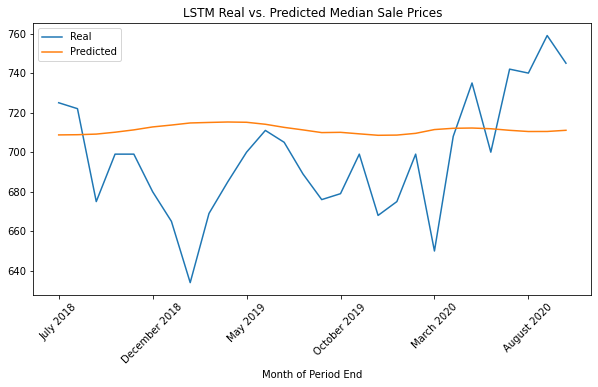

In [551]:
# Plot the real vs predicted values as a line chart
test_prices.plot(title="LSTM Real vs. Predicted Median Sale Prices", figsize=(10, 5))
plt.xticks(rotation=45)

### Review In-Sample Data (Train)

In [552]:
# Generating predictions based on training data set to evaluate model with in-sample data. 
# Evaluating to determine if model was possibly overfit. 

train_predictions = model.predict(X_train_scaled)
train_predictions[:5]

array([[0.15612659],
       [0.16241297],
       [0.16535303],
       [0.16439849],
       [0.16341457]], dtype=float32)

In [553]:
# Predictions created off of y_train data and inverse transform completed to get real data back
# following scaling. 

train_predicted_prices = scaler.inverse_transform(train_predictions)
train_real_prices = scaler.inverse_transform(y_train_scaled.reshape(-1, 1))

In [554]:
# Putting trained data predictions back into dataframe. 

train_prices = pd.DataFrame({
    "Real": train_real_prices.ravel(),
    "Predicted": train_predicted_prices.ravel()
}, index = seattle_df.index[-len(train_real_prices): ]) 
train_prices.head()

,Real,Predicted
Month of Period End,,
July 2015,365.0,426.513855
August 2015,399.0,428.990692
September 2015,390.0,430.149078
October 2015,405.0,429.773010
November 2015,410.0,429.385345


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, 'January 2020'),
  Text(0.0, 0, 'July 2015'),
  Text(10.0, 0, 'May 2016'),
  Text(20.0, 0, 'March 2017'),
  Text(30.0, 0, 'January 2018'),
  Text(40.0, 0, 'November 2018'),
  Text(50.0, 0, 'September 2019'),
  Text(60.0, 0, 'July 2020'),
  Text(70.0, 0, '')])

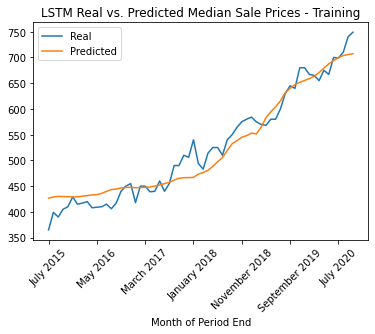

In [555]:
# Plot the real vs predicted values as a line chart of training data.
train_prices.plot(title="LSTM Real vs. Predicted Median Sale Prices - Training")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Seattle Correlation Matrix')

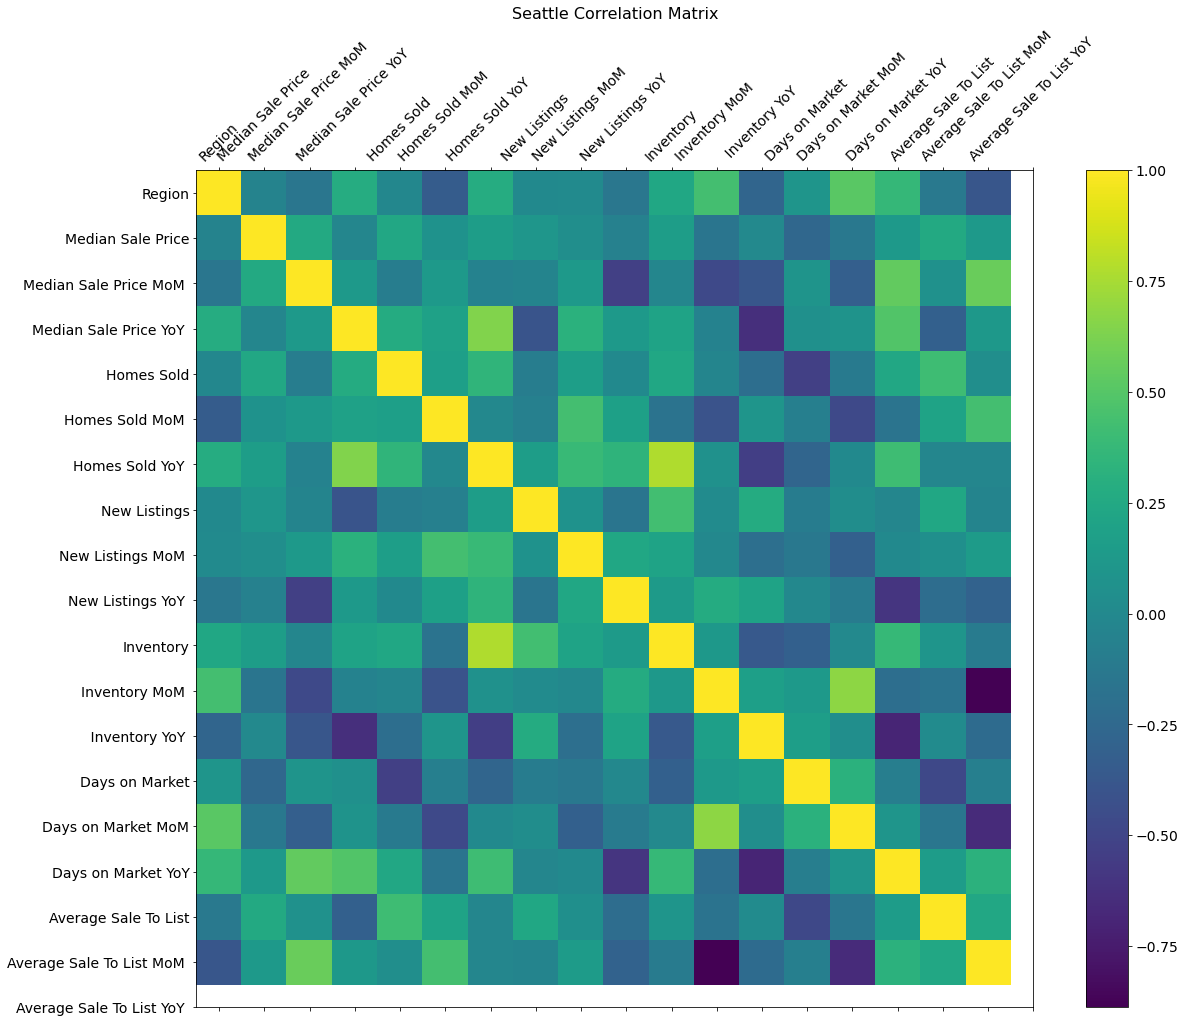

In [556]:
# Correlation Map for Seattle Data #1

seattle_corr = plt.figure(figsize=(19, 15))
plt.matshow(seattle_df.corr(), fignum=seattle_corr.number)
plt.xticks(range(seattle_df.shape[1]), seattle_df.columns, fontsize=14, rotation=45)
plt.yticks(range(seattle_df.shape[1]), seattle_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Seattle Correlation Matrix', fontsize=16)

In [403]:
# Correlation Map for Seattle Data #2
seattle_df.corr().style.background_gradient(cmap='coolwarm')
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html for color options

,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Median Sale Price,1.000000,-0.045742,-0.149035,0.283413,-0.011550,-0.342316,0.278889,0.005394,0.012036,-0.140889,0.234800,0.433438,-0.271106,0.098617,0.513347,0.373056,-0.127482,-0.380721
Median Sale Price MoM,-0.045742,1.000000,0.261898,-0.020376,0.241455,0.071774,0.162232,0.100458,0.046433,-0.057987,0.166415,-0.151886,-0.001945,-0.260568,-0.134575,0.123633,0.260561,0.125776
Median Sale Price YoY,-0.149035,0.261898,1.000000,0.135452,-0.089502,0.125510,-0.048912,-0.035934,0.135199,-0.528416,-0.018300,-0.471349,-0.384530,0.090749,-0.312947,0.543721,0.063815,0.570355
Homes Sold,0.283413,-0.020376,0.135452,1.000000,0.274324,0.194786,0.640544,-0.400958,0.317887,0.131809,0.206458,-0.050710,-0.636993,0.059293,0.082924,0.487215,-0.312397,0.117794
Homes Sold MoM,-0.011550,0.241455,-0.089502,0.274324,1.000000,0.178239,0.348083,-0.088646,0.170219,0.004867,0.233076,-0.030686,-0.207429,-0.529980,-0.112950,0.241159,0.415263,0.045320
Homes Sold YoY,-0.342316,0.071774,0.125510,0.194786,0.178239,1.000000,-0.004414,-0.063277,0.432385,0.183139,-0.170007,-0.405482,0.095969,-0.073242,-0.468789,-0.160177,0.207160,0.437606
New Listings,0.278889,0.162232,-0.048912,0.640544,0.348083,-0.004414,1.000000,0.164968,0.381507,0.336261,0.773186,0.069081,-0.538598,-0.271996,0.010245,0.412000,-0.018452,-0.020421
New Listings MoM,0.005394,0.100458,-0.035934,-0.400958,-0.088646,-0.063277,0.164968,1.000000,0.077985,-0.156155,0.428199,0.026092,0.270991,-0.098755,0.037877,-0.018339,0.238775,-0.033977
New Listings YoY,0.012036,0.046433,0.135199,0.317887,0.170219,0.432385,0.381507,0.077985,1.000000,0.236355,0.205978,-0.005011,-0.197824,-0.130924,-0.308131,0.010881,0.054056,0.150908
Inventory,-0.140889,-0.057987,-0.528416,0.131809,0.004867,0.183139,0.336261,-0.156155,0.236355,1.000000,0.139690,0.273371,0.203805,-0.008187,-0.102285,-0.599326,-0.213452,-0.297804


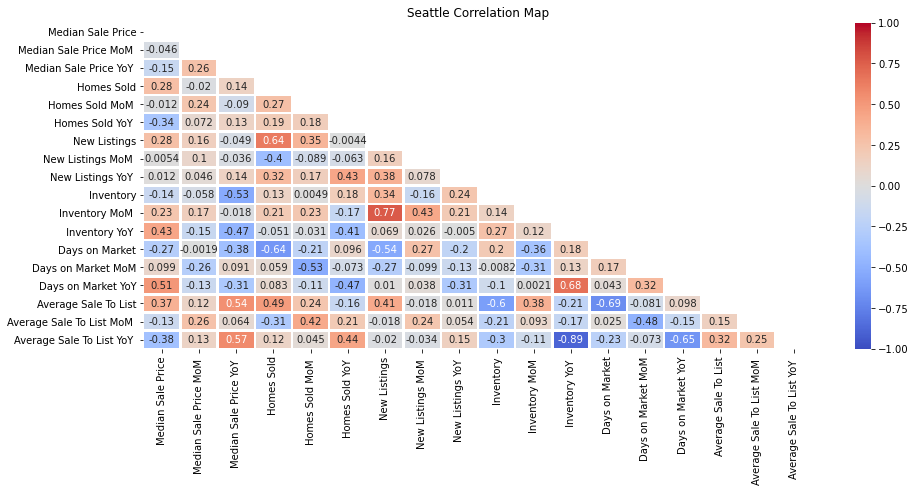

In [508]:
# Correlation Map for Seattle Data #3 - Will be map used, based on aesthetics. 

import seaborn as sns
# sns.heatmap(seattle_df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap="coolwarm", 
#             linecolor="black")

corr = seattle_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15, 6))
corr = sns.heatmap(seattle_df.corr(), annot=True, linewidths=1.5, vmin=-1, vmax=1, ax=ax, mask=mask,
            cmap="coolwarm").set_title("Seattle Correlation Map")

### Neighborhood Map

In [405]:
# Reading in zip code data to try and get an interactive map of all neighborhoods. 

zip_codes = Path("Zip_Codes.csv")
zip_df = pd.read_csv(zip_codes)
zip_df.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,SHAPE_Length,SHAPE_Area
0,3,98033,98033,33,101363.84040,2.566747e+08
1,6,98027,98027,33,255232.06510,1.640576e+09
2,8,98039,98039,33,37222.72934,3.934682e+07
3,9,98040,98040,33,75519.64851,1.755842e+08
4,16,98052,98052,33,166796.78250,5.360575e+08


In [406]:
zip_df.dtypes

OBJECTID          int64
ZIP               int64
ZIPCODE           int64
COUNTY            int64
SHAPE_Length    float64
SHAPE_Area      float64
dtype: object

In [407]:
# fig = px.choropleth(zip_df, 
#                     locations="ZIP", 
#                     locationmode = "ISO-3", 
#                     color="ZIP", 
#                     hover_name="ZIP", 
#                     animation_frame="ZIP",
#                     width=800, height=600,
#                    )
# fig.update_layout(
#     title_text = 'Test',
#     title_x = 0.5,
#     geo=dict(
#         showframe = False,
#         showcoastlines = False,
#     )
# )
    
# fig.show()

In [408]:
# import json
# json.load(https://gisdata.seattle.gov/server/rest/services/COS/Seattle_City_Limits/MapServer/2/query?where=1%3D1&outFields=*&outSR=4326&f=json)

### Linear Regression

In [409]:
# Testing Linear Regression to compare performance vs. LSTM model.
# Running model with target of Median Sale price and all other data as feature 
# values (multiple regression).
# Did try running only on Median Sale Price % Change and lagged % change, but poor results.
# Only needed to create a lagged column, as Median Sale Price MoM already gives pct_change.
# https://towardsdatascience.com/multiple-linear-regression-8cf3bee21d8b

linear_df = seattle_df.copy()
# linear_df.reset_index()
# linear_df.groupby(["Month of Period End", "Region"]).sum()
# linear_df["Lagged % Change"] = linear_df["Median Sale Price MoM "].shift()
# linear_df = linear_df.dropna()
# linear_df.head()

In [410]:
# RUnning model with Median Sale price as target and all other integer columns as vectors. 

# X = linear_df["Lagged % Change"].to_frame()
# y = linear_df["Median Sale Price % Change"]

# Tried model with target data excluding MoM and YoY changes, but model performance declined. 
# X = linear_df[["Homes Sold", "New Listings","Inventory", "Days on Market", "Average Sale To List" ]].copy()
# y = linear_df["Median Sale Price"].ravel()

X = linear_df.drop(columns=["Median Sale Price", "Region"])
y = linear_df["Median Sale Price"]
y[:5]

Month of Period End
February 2012    320
March 2012       350
April 2012       379
May 2012         380
June 2012        380
Name: Median Sale Price, dtype: int64

In [411]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

print(y_train.shape)
print(y_test.shape)

(73,)
(32,)


In [412]:
# Scaling was tried, but no real impact made.  No scaling to be utilized at this point. 

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# scaler.fit(X)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # scaler.fit(y)
# # y_train_scaled = scaler.transform(y_train)
# # y_test_scaled = scaler.transform(y_test)

In [413]:
# Fitting the Linear Regression model and generating a score from the model. 

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_train, y_train)

0.9195773549700108

In [420]:
# Generating predictions based on X_test data and putting into a dataframe.

linear_predictions = model.predict(X_test)
linear_results = pd.DataFrame({
    
    "Predictions":linear_predictions,
    "Actual":y_test
}, index=seattle_df.index[-len(y_test): ]) 

linear_results.tail()

,Predictions,Actual
Month of Period End,,
June 2020,378.771920,742
July 2020,383.078525,740
August 2020,387.725208,759
September 2020,364.288586,745
October 2020,418.104577,746


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, 'June 2020'),
  Text(0.0, 0, 'March 2018'),
  Text(5.0, 0, 'August 2018'),
  Text(10.0, 0, 'January 2019'),
  Text(15.0, 0, 'June 2019'),
  Text(20.0, 0, 'November 2019'),
  Text(25.0, 0, 'April 2020'),
  Text(30.0, 0, 'September 2020'),
  Text(35.0, 0, '')])

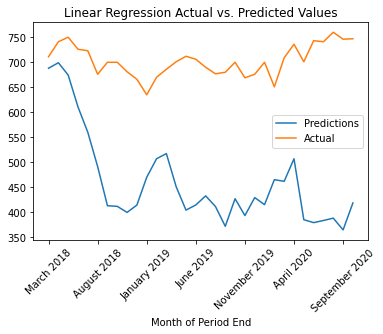

In [421]:
linear_results.plot(title="Linear Regression Actual vs. Predicted Values")
plt.xticks(rotation=45)

In [424]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# Very poor RMSE and R2 scores found on model. 

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(
    results["Actual"],
    results["Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
r2 = r2_score(y_test, linear_predictions)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"R2 Score: {r2}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.0
R2 Score: -68.79445442894242


In [425]:
# Construct a DataFrame using just the "y" training data:

in_sample_predictions = model.predict(X_train)
in_sample_results = pd.DataFrame({
    
    "Predictions":in_sample_predictions,
    "Actual":y_train
}).reset_index(drop=True)

in_sample_results.head()

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Actual"],
    in_sample_results["Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
in_sample_r2 = r2_score(y_train, in_sample_predictions)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In sample R2 Score: {in_sample_r2}")

In-sample Root Mean Squared Error (RMSE): 29.50775986827347
In sample R2 Score: 0.9195773549700108


### Balanced Random Forest Model

In [426]:
# Creating a Balanced Random Forest model on Seattle only data.

brf_df = seattle_df.copy().reset_index()
brf_df = brf_df.set_index("Region")

In [427]:
# Setting month of period end to datetime format. 

brf_df['Month of Period End'] = pd.to_datetime(brf_df['Month of Period End'], 
                                               infer_datetime_format=True)


In [428]:
# Defining X and y variables for BRF model. Only using columns that do not represent YoY or MoM changes.

X = brf_df[["Homes Sold", "New Listings","Inventory", "Days on Market", "Average Sale To List" ]].copy()
y = brf_df["Median Sale Price"].ravel()
y[:5]

array([320, 350, 379, 380, 380], dtype=int64)

In [429]:
# Splitting data into train and test variables. 

split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [430]:
# Scaling data for model. 

# from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedRandomForestClassifier
scaler = StandardScaler().fit(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Balanced Random Forest Testing Data Results

In [431]:
# Creating Balanced Random Forest Model

brf = BalancedRandomForestClassifier(n_estimators=1000, random_state=1)
brf.fit(X_train_scaled, y_train)

brf_predictions = brf.predict(X_test_scaled)

brf_results = pd.DataFrame({
    
    "Predictions":brf_predictions,
    "Actual":y_test
}, index=seattle_df.index[-len(y_test): ]) 

brf_results.tail()

,Predictions,Actual
Month of Period End,,
June 2020,405,742
July 2020,405,740
August 2020,405,759
September 2020,405,745
October 2020,429,746


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, 'June 2020'),
  Text(0.0, 0, 'March 2018'),
  Text(5.0, 0, 'August 2018'),
  Text(10.0, 0, 'January 2019'),
  Text(15.0, 0, 'June 2019'),
  Text(20.0, 0, 'November 2019'),
  Text(25.0, 0, 'April 2020'),
  Text(30.0, 0, 'September 2020'),
  Text(35.0, 0, '')])

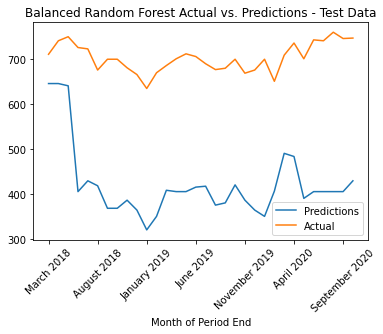

In [432]:
brf_results.plot(title="Balanced Random Forest Actual vs. Predictions - Test Data")
plt.xticks(rotation=45)

### Balanced Random Forest Training Data Results

In [434]:
# Plotting against training data to see how model performs with data it saw. 

predictions = brf.predict(X_train_scaled)

results2 = pd.DataFrame({
    
    "Predictions":predictions,
    "Actual":y_train
}).reset_index(drop=True)

results2.tail()

,Predictions,Actual
68,655,655
69,675,675
70,667,667
71,700,700
72,699,699


<AxesSubplot:title={'center':'Balanced Random Forest Actual vs. Predictions - Train Data'}>

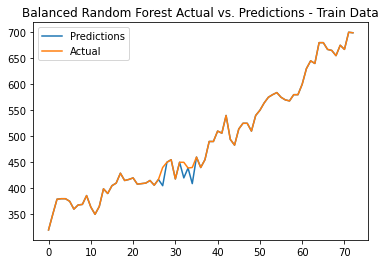

In [435]:
results2.plot(title="Balanced Random Forest Actual vs. Predictions - Train Data")

In [436]:
# Reviewing feature importance for Balanced Random Forest Model.

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
importances = brf.feature_importances_

<AxesSubplot:title={'center':'Seattle Balanced Random Forest Features Importances'}, ylabel='1'>

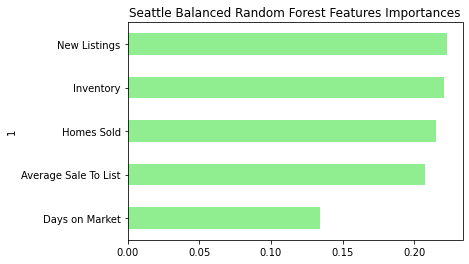

In [437]:
# Putting feature importances from balanced random forest model into a dataframe and plotting 
# to visualize feature importance of the model. 

importances_df = pd.DataFrame(sorted(zip(brf.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', 
                        title= 'Seattle Balanced Random Forest Features Importances', legend=False)

### Random Forest Model 

In [479]:
# Creating Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
# from imblearn.ensemble import BalancedRandomForestClassifier

# Scaling the datat for the model. 
scaler = StandardScaler().fit(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest Testing Data Results

In [480]:
# Fitting the random forest model, generating predictions, and putting actual vs. predicted values 
# into a dataframe. 

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train_scaled, y_train)

rf_predictions = rf.predict(X_test_scaled)

rf_results = pd.DataFrame({
    
    "Predictions":rf_predictions,
    "Actual":y_test
}, index=seattle_df.index[-len(y_test): ]) 

rf_results.tail()

,Predictions,Actual
Month of Period End,,
June 2020,405,742
July 2020,405,740
August 2020,405,759
September 2020,490,745
October 2020,417,746


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, 'June 2020'),
  Text(0.0, 0, 'March 2018'),
  Text(5.0, 0, 'August 2018'),
  Text(10.0, 0, 'January 2019'),
  Text(15.0, 0, 'June 2019'),
  Text(20.0, 0, 'November 2019'),
  Text(25.0, 0, 'April 2020'),
  Text(30.0, 0, 'September 2020'),
  Text(35.0, 0, '')])

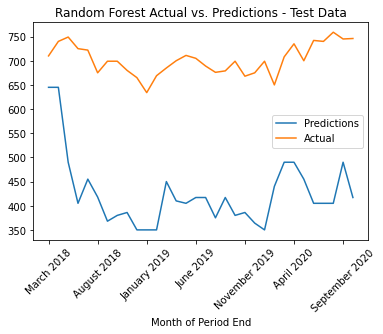

In [481]:
rf_results.plot(title="Random Forest Actual vs. Predictions - Test Data")
plt.xticks(rotation=45)

### Random Forest Training Data Results

In [482]:
# Plotting against trained data to see performance / check for overfit. 
predictions = rf.predict(X_train_scaled)

results = pd.DataFrame({
    
    "Predictions":predictions,
    "Actual":y_train
}).reset_index(drop=True)

results.tail()

,Predictions,Actual
68,655,655
69,675,675
70,667,667
71,700,700
72,699,699


<AxesSubplot:title={'center':'Random Forest Actual vs. Predictions - Training Data'}>

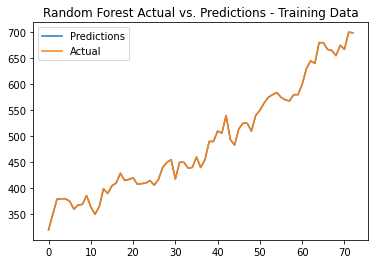

In [483]:
# When plotting actual vs. predictions, model was 100% accurate on training data.  Seemingly the 
# model was overfit, since performance was poor on testing data. 

results.plot(title="Random Forest Actual vs. Predictions - Training Data")

<AxesSubplot:title={'center':'Random Forest Features Importances'}, ylabel='1'>

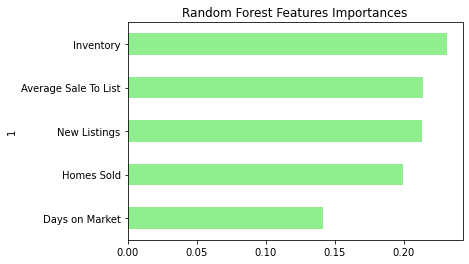

In [484]:
# Putting feature importances from random forest model into a dataframe and plotting 
# to visualize feature importance of the model. 

rf_importances_df = pd.DataFrame(sorted(zip(rf.feature_importances_, X.columns), reverse=True))
rf_importances_df.set_index(rf_importances_df[1], inplace=True)
rf_importances_df.drop(columns=1, inplace=True)
rf_importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
rf_importances_sorted = rf_importances_df.sort_values(by='Feature Importances')
rf_importances_sorted.plot(kind='barh', color='lightgreen', 
                           title= 'Random Forest Features Importances', legend=False)

In [485]:
# Testing PCA on Seattle Data to see if reduction can be used and still potentially generate a 
# valuable model. 

pca_df = seattle_df.reset_index()
pca_df = seattle_df.groupby(["Region", "Month of Period End"]).sum()

# Standardize data
seattle_scaled = StandardScaler().fit_transform(pca_df)
# print(seattle_scaled[0:5])

In [486]:
# Initialize PCA model.  7 components used in an effort to increase the explained variance ratio
# number.  Still onlhy ~80% with 7 components used. 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
pca = PCA(n_components=7)

# Get principal components for the data.
seattle_pca = pca.fit_transform(seattle_scaled)


ModuleNotFoundError: No module named 'plotly'

In [ ]:
# Transform PCA data to a DataFrame
seattle_pca_df = pd.DataFrame(
    data=seattle_pca, 
    columns=["PC 1", "PC 2", "PC 3", "PC 4", "PC 5", "PC 6", "PC 7"])
seattle_pca_df.head()

pca.explained_variance_ratio_

In [487]:
# Utilizing K-Means cluster model to cluster the new dataframe that has had PCA applied to it. 

# Initialize the K-Means model
model = KMeans(n_clusters=8, random_state=0)

# Fit the model
model.fit(seattle_pca_df)

# Predict clusters
predictions = model.predict(seattle_pca_df)

# Add the predicted class columns
seattle_pca_df["class"] = model.labels_
seattle_pca_df.head()


NameError: name 'seattle_pca_df' is not defined

In [448]:
# Creating a 3D plot to visualize data. 

fig = px.scatter_3d(
    seattle_pca_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

NameError: name 'px' is not defined

Text(0.5, 1.0, 'Seattle Correlation Map')

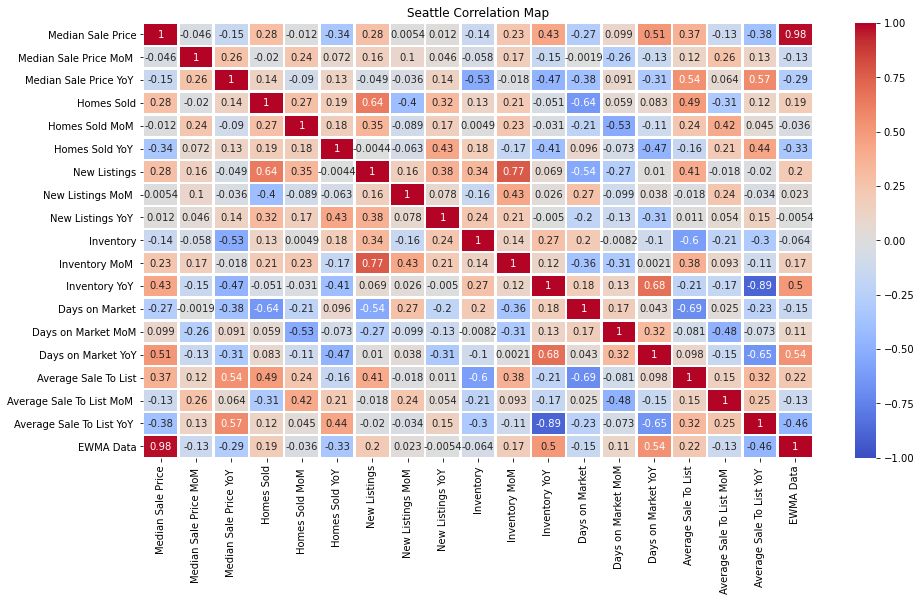

In [464]:
# Testing an updated correlation map, which now includes exponentially weighted moving average data 
# from the Seattle dataframe, just to see if any added correlations can be found. 

linear_df["EWMA Data"] = seattle_hp["Median Sale Price"].ewm(halflife=6).mean()

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(linear_df.corr(), annot=True, linewidths=1.5, vmin=-1, vmax=1, ax=ax, 
            cmap="coolwarm").set_title("Seattle Correlation Map")

In [489]:
new_test_prices = test_prices.reset_index()
new_test_prices.drop(columns=["Month of Period End"], inplace=True)
new_test_prices.head()

new_linear_results = linear_results.reset_index()
new_linear_results.drop(columns=["Month of Period End"], inplace=True)
new_linear_results.head()

new_brf_results = brf_results.reset_index()
new_brf_results.drop(columns=["Month of Period End"], inplace=True)
new_brf_results.head()

new_rf_results = rf_results.reset_index()
new_rf_results.drop(columns=["Month of Period End"], inplace=True)
new_rf_results.head()

,Predictions,Actual
0,645,710
1,645,740
2,490,749
3,405,725
4,455,722


In [501]:
combined_results = pd.concat([new_test_prices, new_linear_results, new_brf_results, new_rf_results], 
                             axis=1)

In [502]:
combined_results.head()

,Real,Predicted,Predictions,Actual,Predictions,Actual,Predictions,Actual
0,725.0,711.600769,687.064270,710,645,710,645,710
1,722.0,711.764343,698.099038,740,645,740,645,740
2,675.0,712.175781,673.502437,749,640,749,490,749
3,699.0,713.286804,609.798679,725,405,725,405,725
4,699.0,714.648254,559.027670,722,429,722,455,722


In [503]:
combined_results.columns = ["LSTM Actual", "LSTM Predictions", "Linear Predictions", "Linear Actual",
                           "BRF Predictions", "BRF Actual", "RF Predictions", "RF Actual"]

combined_results.head()

,LSTM Actual,LSTM Predictions,Linear Predictions,Linear Actual,BRF Predictions,BRF Actual,RF Predictions,RF Actual
0,725.0,711.600769,687.064270,710,645,710,645,710
1,722.0,711.764343,698.099038,740,645,740,645,740
2,675.0,712.175781,673.502437,749,640,749,490,749
3,699.0,713.286804,609.798679,725,405,725,405,725
4,699.0,714.648254,559.027670,722,429,722,455,722


In [504]:
combined_results = combined_results[[
    "LSTM Actual", 
    "LSTM Predictions", 
    "Linear Actual", 
    "Linear Predictions", 
    "BRF Actual", 
    "BRF Predictions", 
    "RF Actual", 
    "RF Predictions"]]

In [505]:
combined_results.head()

,LSTM Actual,LSTM Predictions,Linear Actual,Linear Predictions,BRF Actual,BRF Predictions,RF Actual,RF Predictions
0,725.0,711.600769,710,687.064270,710,645,710,645
1,722.0,711.764343,740,698.099038,740,645,740,645
2,675.0,712.175781,749,673.502437,749,640,749,490
3,699.0,713.286804,725,609.798679,725,405,725,405
4,699.0,714.648254,722,559.027670,722,429,722,455


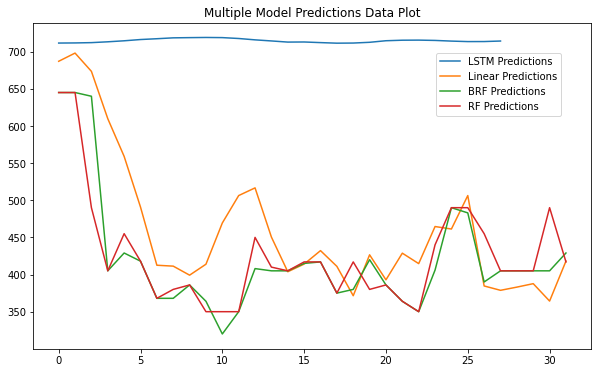

In [506]:
combined_results.plot(y=["LSTM Predictions", "Linear Predictions", "BRF Predictions", "RF Predictions"],
                      figsize=(10, 6), title="Multiple Model Predictions Data Plot")
plt.legend(loc="upper right", borderaxespad=3)

<AxesSubplot:title={'center':'Multiple Model Actual Data Plot'}>

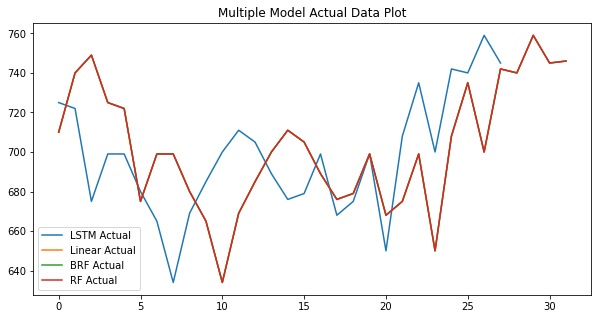

In [507]:
combined_results.plot(y=["LSTM Actual", "Linear Actual", "BRF Actual", "RF Actual"], figsize=(10, 5), 
title="Multiple Model Actual Data Plot")
